In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("Tensorflow版本是:", tf.__version__)

Tensorflow版本是: 2.1.0


In [5]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 731c5ac602752760c8e48fbffcf8c3b850d9dc2a2aedcf2cc48468fc17b673d1 so we will re-download the data.
11493376/11490434 [==============================] - 415s 36us/step


In [6]:
print("Train image shape:", train_images.shape, "Train label shape:", train_labels.shape)
print("Test image shape:", test_images.shape, "Test label shape:", test_labels.shape)

Train image shape: (60000, 28, 28) Train label shape: (60000,)
Test image shape: (10000, 28, 28) Test label shape: (10000,)


In [7]:
print("image data:", train_images[1])

image data: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 25

In [8]:
print("label data:", train_labels[1])

label data: 0


In [9]:
type(train_images[1, 1 , 1])

numpy.uint8

In [17]:
import matplotlib.pyplot as plt
def plot_image(image):
    plt.imshow(image.reshape(28, 28), cmap="binary")
    plt.show()

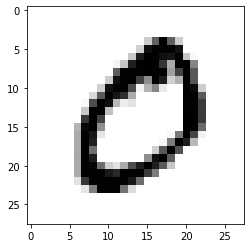

In [18]:
plot_image(train_images[1])

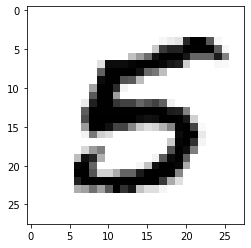

In [19]:
plot_image(train_images[20000])

In [20]:
 train_labels[20000]

5

In [31]:
import numpy as np
int_array = np.array([i for i in range(64)])
print(int_array)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


In [32]:
int_array.reshape(8,8)

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

In [33]:
int_array.reshape(4,16)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]])

In [39]:
int_array.reshape(-1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

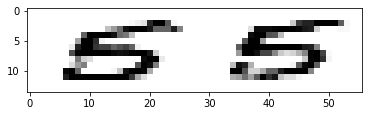

In [34]:
plt.imshow(train_images[20000].reshape(14,56), cmap="binary")

In [37]:
total_num = len(train_images)
valid_split = 0.2
train_num = int(total_num * (1-valid_split))
train_x =  train_images[:train_num]
train_y =  train_labels[:train_num]
valid_x =  train_images[train_num:]
valid_y =  train_labels[train_num:]
test_x = test_images
test_y = test_labels

In [38]:
valid_x.shape

(12000, 28, 28)

In [40]:
train_x = train_x.reshape(-1, 784)
valid_x = valid_x.reshape(-1, 784)
test_x = test_x.reshape(-1, 784)

In [42]:
train_x = tf.cast(train_x/255.0, tf.float32)
valid_x = tf.cast(valid_x/255.0, tf.float32)
test_x = tf.cast(test_x/255.0, tf.float32)

In [43]:
train_x[1]

<tf.Tensor: shape=(784,), dtype=float32, numpy=
array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.00000

In [45]:
x=[3,4]
tf.one_hot(x, depth=10)

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

In [46]:
train_y = tf.one_hot(train_y, depth=10)
valid_y = tf.one_hot(valid_y, depth=10)
test_y = tf.one_hot(test_y, depth=10)

In [47]:
train_y

<tf.Tensor: shape=(48000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)>

In [48]:
def model(x, w, b):
    pred = tf.matmul(x, w) + b
    return tf.nn.softmax(pred)

In [49]:
W = tf.Variable(tf.random.normal([784, 10],mean=0.0, stddev=1.0, dtype=tf.float32))
B = tf.Variable(tf.zeros([10]), dtype = tf.float32)

In [50]:
def loss(x, y, w, b):
    pred = model(x, w, b)
    loss_ = tf.keras.losses.categorical_crossentropy(y_true = y, y_pred = pred)
    return tf.reduce_mean(loss_)

In [52]:
training_epochs = 20
batch_size = 50
learning_rate = 0.001

In [53]:
def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)
    return tape.gradient(loss_, [w, b])

In [54]:
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

In [64]:
def accuracy(x, y, w, b):
    pred = model(x, w, b)
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [66]:
total_step = int(train_num/batch_size)
loss_list_train = []
loss_list_valid = []
acc_list_train = []
acc_list_valid = []
for epoch in range(training_epochs):
    for step in range(total_step):
        xs = train_x[step * batch_size:(step+1) * batch_size]
        ys = train_y[step * batch_size:(step+1) * batch_size]
        grads = grad(xs, ys, W, B)
        optimizer.apply_gradients(zip(grads, [W, B]))
    loss_train = loss(train_x, train_y, W, B).numpy()
    loss_valid = loss(valid_x, valid_y, W, B).numpy()
    acc_train = accuracy(train_x, train_y, W, B).numpy()
    acc_valid = accuracy(valid_x, valid_y, W, B).numpy()
    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)
    acc_list_train.append(acc_train)
    acc_list_valid.append(acc_valid)
    print("epoch={:3d}, train_loss={:.4f}, train_acc={:.4f}, val_loss={:.4f}, val_acc{:.4f}".format(epoch+1, loss_train, acc_train, loss_valid, acc_valid)) 

epoch=  1, train_loss=1.7411, train_acc=0.7404, val_loss=1.7289, val_acc0.7558
epoch=  2, train_loss=1.6509, train_acc=0.7529, val_loss=1.6366, val_acc0.7680
epoch=  3, train_loss=1.5673, train_acc=0.7636, val_loss=1.5509, val_acc0.7797
epoch=  4, train_loss=1.4899, train_acc=0.7726, val_loss=1.4716, val_acc0.7885
epoch=  5, train_loss=1.4185, train_acc=0.7805, val_loss=1.3983, val_acc0.7967
epoch=  6, train_loss=1.3526, train_acc=0.7869, val_loss=1.3307, val_acc0.8033
epoch=  7, train_loss=1.2918, train_acc=0.7930, val_loss=1.2684, val_acc0.8102
epoch=  8, train_loss=1.2359, train_acc=0.7983, val_loss=1.2110, val_acc0.8160
epoch=  9, train_loss=1.1844, train_acc=0.8030, val_loss=1.1582, val_acc0.8203
epoch= 10, train_loss=1.1370, train_acc=0.8076, val_loss=1.1097, val_acc0.8245
epoch= 11, train_loss=1.0934, train_acc=0.8121, val_loss=1.0650, val_acc0.8288
epoch= 12, train_loss=1.0532, train_acc=0.8155, val_loss=1.0238, val_acc0.8327
epoch= 13, train_loss=1.0160, train_acc=0.8193, val_

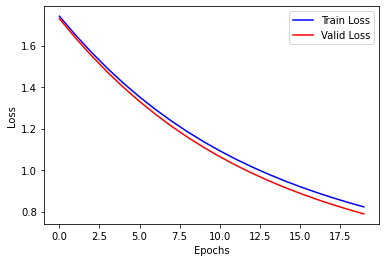

In [68]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss_list_train, "blue", label = "Train Loss")
plt.plot(loss_list_valid, "red", label = "Valid Loss")
plt.legend(loc = 1)

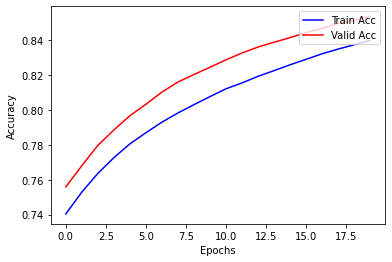

In [70]:
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(acc_list_train, "blue", label = "Train Acc")
plt.plot(acc_list_valid, "red", label = "Valid Acc")
plt.legend(loc = 1)

In [73]:
acc_test = accuracy(test_x, test_y, W, B).numpy()
print("Test accuracy:", acc_test)

Test accuracy: 0.8504


In [75]:
def predict(x, w, b):
    pred = model(x, w, b)
    result = tf.argmax(pred, 1).numpy()
    return result

In [76]:
pred_test = predict(test_x, W, B)

In [78]:
print(test_labels)

[7 2 1 ... 4 5 6]


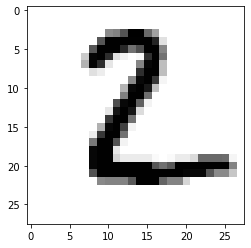

In [107]:
plt.imshow(test_images[1].reshape(28, 28), cmap="binary")

In [104]:
pred_test[1]

2

In [116]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images, labels, preds, index = 0, num = 10):
    fig = plt.gcf()
    fig.set_size_inches(10, 5)
    if num > 10:
        num = 10
    for i in range(0, num):
        ax = plt.subplot(2, 5, i+1)
        ax.imshow(np.reshape(images[index], (28, 28)), cmap = "binary")
        title = "label=" + str(labels[index])
        if len(preds) > 0:
            title += "predict=" + str(preds[index])
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([])
        ax.set_xticks([])
        index = index + 1
    plt.show()

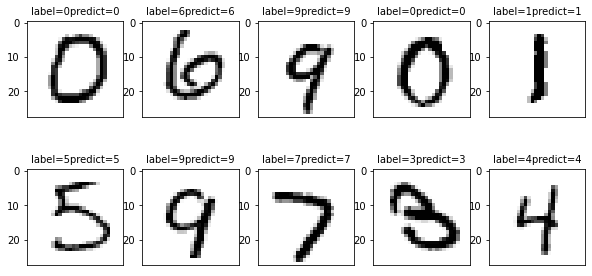

In [117]:
plot_images_labels_prediction(test_images, test_labels, pred_test, 10, 10)